# Classificação multiclasse

## Nosso problema

Modelo para previsão de evasão de estudantes de uma faculdade. Para isso, iremos trabalhar com uma base de dados reais (adaptada) de uma faculdade de Portugal (o Instituto Politécnico de Portalegre), com dados demográficos, sócio-econômicos, macroeconômicos e de disciplinas para o 1º e 2º semestre. A base original está [neste link](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) e [neste outro link](https://www.mdpi.com/2306-5729/7/11/146) você pode ler o artigo que gerou este dataset. 

Estes dados são representativos dos registros de estudantes matriculados no período entre os anos letivos de 2008/2009 (após a implementação do Processo de Bolonha no ensino superior europeu) e 2018/2019. Eles abrangem 17 cursos de graduação em diversas áreas do conhecimento, como agronomia, design, educação, enfermagem, jornalismo, gestão, serviço social e tecnologias.

In [1]:
import pandas as pd

# read_csv also accepts a URL to a CSV file as parameter
# df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/dados_estudantes.csv')
df = pd.read_csv('dados_estudantes.csv')
df.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

Verificando os valores da variável alvo (coluna `Target`):

In [3]:
df.Target.unique()

array(['Desistente', 'Graduado', 'Matriculado'], dtype=object)

Observe que temos três classes ('Desistente', 'Graduado', 'Matriculado'), portanto, o nosso problema é de classificação **multiclasse** e não binária.

## Desafio

Existe uma função chamada describe() na biblioteca Pandas que é capaz de descrever estatisticamente os dados.

Essa função pode ser usada em dados numéricos ou categóricos.

Desafiamos você a aplicar essa função em ambos os tipos de dados para enriquecer nossa compreensão das informações.

In [4]:
# by default, describe will show info for numerical features
df.describe()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,11.566139,1.228029,0.001969,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316
std,7.587816,2.663850,1.382711,2.269935,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774
min,17.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,9.400000,0.300000,-1.700000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000
50%,20.000000,11.100000,1.400000,0.320000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000
75%,25.000000,13.900000,2.600000,1.790000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000
max,70.000000,16.200000,3.700000,3.510000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000


In [5]:
# selecting only categorical features to apply the describe
categorical_features = ['Estado civil', 'Migração', 'Sexo', 'Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',  'Taxas de matrícula em dia', 'Bolsista', 'Curso', 'Período', 'Qualificação prévia', 'Target']

df[categorical_features].describe()

,Estado civil,Migração,Sexo,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Curso,Período,Qualificação prévia,Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,2,2,2,2,2,2,2,17,2,17,3
top,Solteiro,Sim,Feminino,Não,Não,Não,Sim,Não,Enfermagem,Diurno,Educação secundária,Graduado
freq,3919,2426,2868,4314,4373,3921,3896,3325,766,3941,3717,2209


## EDA

### Análise demográfica

In [6]:
# percentage of the values available in the selected feature
df['Estado civil'].value_counts(normalize=True)*100

Solteiro               88.584991
Casado                  8.566908
Divorciado              2.056962
União Estável           0.565099
Legalmente Separado     0.135624
Viúvo                   0.090416
Name: Estado civil, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

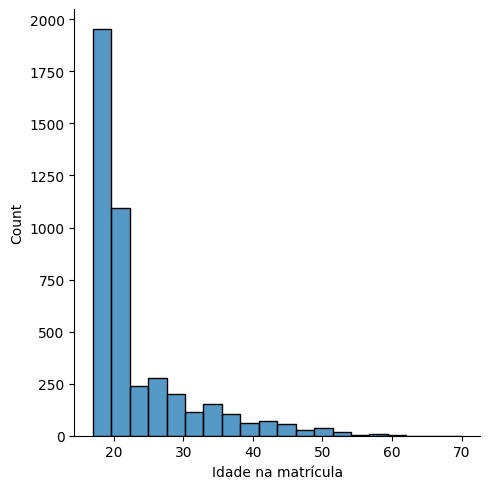

In [8]:
sns.displot(df['Idade na matrícula'], bins=20)
plt.show()

Vamos analisar a coluna "Target" com relação à idade, aplicando uma cor diferente para cada valor de target. Podemos informar as cores a serem utilizadas por meio da função `set_palette`, que irá utilizar as cores na ordem em que aparecem na lista passada via parâmetro.

In [9]:
color_dict = {'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'}
sns.set_palette(list(color_dict.values()))

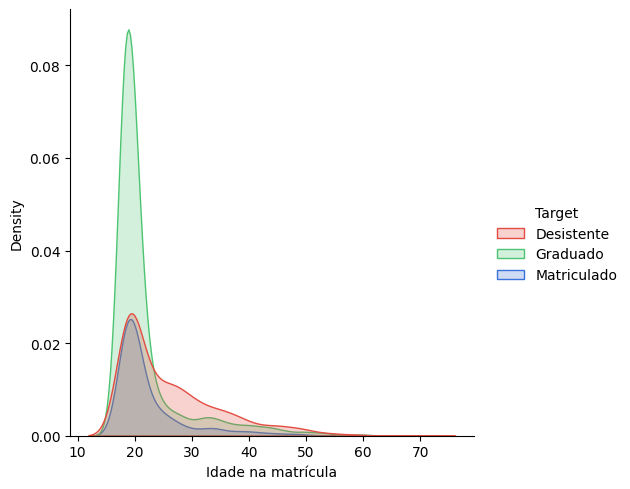

In [10]:
sns.displot(df, x='Idade na matrícula', hue='Target', kind='kde', fill=True)
plt.show()

Podemos observar que a desistência aumenta conforme a idade na matrícula aumenta.

In [11]:
df.Estrangeiro.value_counts(normalize=True)*100

Não    97.513562
Sim     2.486438
Name: Estrangeiro, dtype: float64

In [12]:
df.Sexo.value_counts(normalize=True)*100

Feminino     64.82821
Masculino    35.17179
Name: Sexo, dtype: float64

Vamos verificar o sexo biológico da pessoa e a coluna Target:

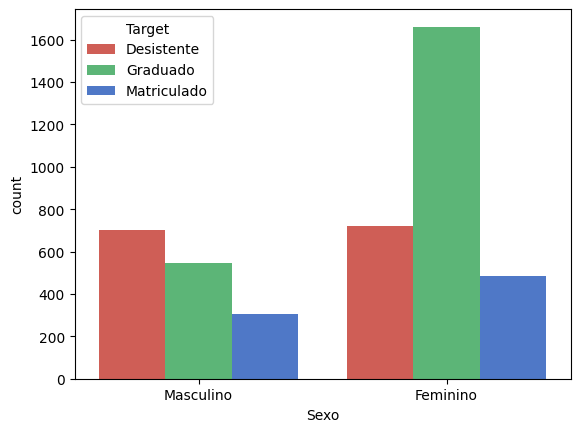

In [13]:
sns.countplot(data=df, x='Sexo', hue='Target')
plt.show()

Mesmo gráfico sem o `hue`

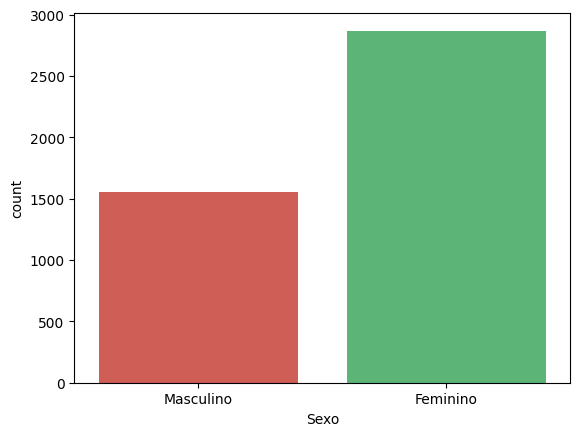

In [14]:
sns.countplot(data=df, x='Sexo')
plt.show()

### Análise econômica

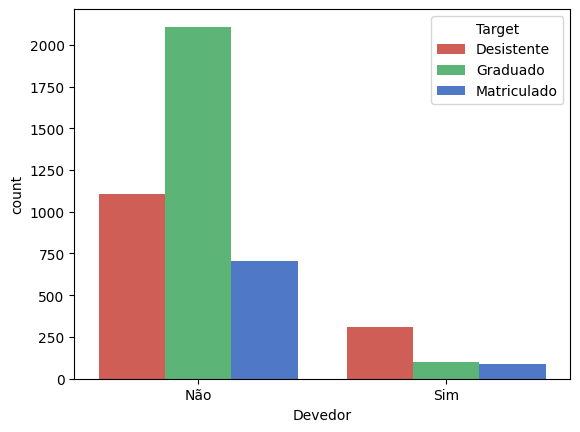

In [15]:
sns.countplot(data=df, x='Devedor', hue='Target')
plt.show()

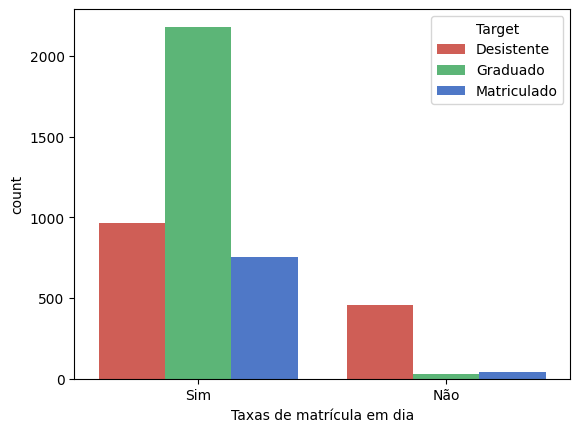

In [16]:
sns.countplot(data=df, x='Taxas de matrícula em dia', hue='Target')
plt.show()

Podemos perceber que, nas pessoas com algum problema ecônomico (devendo mensalidades ou sem a matrícula em dia), a quantidade de desistentes é maior. Mas será que o mesmo comportamento pode ser visto nos alunos bolsistas (que não pagam mensalidade ou recebem algum auxílio)? Segue o plot abaixo:

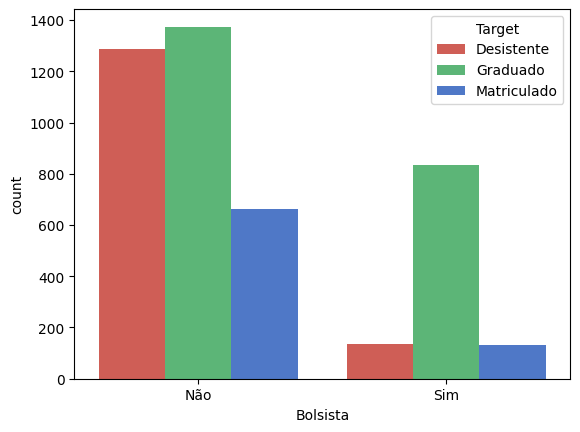

In [17]:
sns.countplot(data=df, x='Bolsista', hue='Target')
plt.show()

### Análise dos cursos

Iremos utilizar o plotly para fazer um gráfico interativo.

In [18]:
import plotly.express as px

In [19]:
# group by Curso and then by Target and sum the ocurrences of each class in Target, by Curso
contagem_por_curso = df.groupby(['Curso', 'Target']).size()
contagem_por_curso

Curso                                       Target     
Agronomia                                   Desistente      86
                                            Graduado        87
                                            Matriculado     37
Animação e Design Multimídia                Desistente      82
                                            Graduado        96
                                            Matriculado     37
Design de Comunicação                       Desistente      51
                                            Graduado       133
                                            Matriculado     42
Educação Básica                             Desistente      85
                                            Graduado        57
                                            Matriculado     50
Enfermagem                                  Desistente     118
                                            Graduado       548
                                            Matriculado    100

Esse agrupamento retornou uma Series, em que cada entrada possui Curso e Target como índices. Podemos resetar esse índice e dar um nome à coluna que tem os valores, criando assim um DataFrame.

- Quando o índice é resetado, o índice anterior é transformado em uma coluna. Neste caso, os índices Curso e Target viram colunas.

In [20]:
contagem_por_curso = df.groupby(['Curso', 'Target']).size().reset_index(name='Contagem')
contagem_por_curso.head()

,Curso,Target,Contagem
0,Agronomia,Desistente,86
1,Agronomia,Graduado,87
2,Agronomia,Matriculado,37
3,Animação e Design Multimídia,Desistente,82
4,Animação e Design Multimídia,Graduado,96


Podemos também adicionar uma nova coluna que informa a porcentagem de cada Target para cada Curso, com base na contagem total por curso:

In [21]:
# for each grouped "Curso", for each row in each group, apply the lambda to get the percentage to the total for that group
contagem_por_curso['Porcentagem'] = contagem_por_curso.groupby('Curso')['Contagem'].transform(lambda x: (x/x.sum())*100)

contagem_por_curso.head(6)

,Curso,Target,Contagem,Porcentagem
0,Agronomia,Desistente,86,40.952381
1,Agronomia,Graduado,87,41.428571
2,Agronomia,Matriculado,37,17.619048
3,Animação e Design Multimídia,Desistente,82,38.139535
4,Animação e Design Multimídia,Graduado,96,44.651163
5,Animação e Design Multimídia,Matriculado,37,17.209302


Plotando o resultado:

In [22]:
fig = px.bar(contagem_por_curso, y='Curso', x='Porcentagem', color='Target', color_discrete_map=color_dict)


In [23]:
fig.show()

### Análise das notas

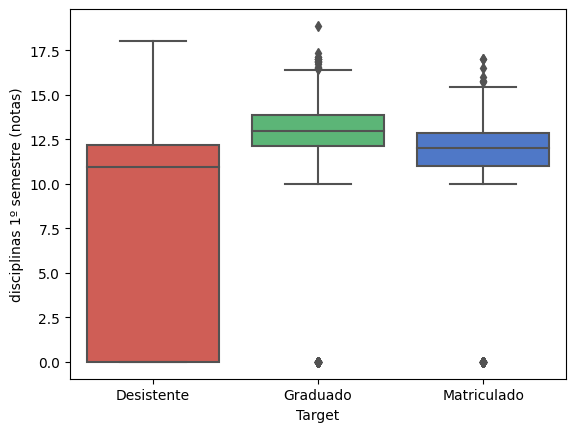

In [24]:
sns.boxplot(data=df, x='Target', y='disciplinas 1º semestre (notas)')
plt.show()

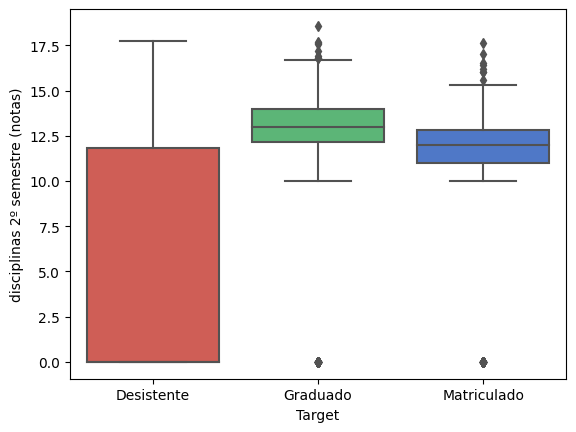

In [25]:
sns.boxplot(data=df, x='Target', y='disciplinas 2º semestre (notas)')
plt.show()

Podemos notar que notas baixas influenciam bastante na desistência do curso (ou talvez o contrário, o fato de a pessoa desistir já influencia em nem se dedicar a tirar boas notas ou fazer as provas).

### Análise do balanceamento dos dados

In [26]:
df.Target.value_counts(normalize=True)*100

Graduado       49.932188
Desistente     32.120253
Matriculado    17.947559
Name: Target, dtype: float64

Nossos dados estão **desbalanceados**. Futuramente, iremos verificar como isso pode impactar nos modelos de classificação que iremos criar.

### Desafio

Agora, seu desafio consiste em uma análise abrangente das seguintes variáveis:

- Migração
- Necessidades educacionais especiais
- Taxa de desemprego
- Taxa de inflação
- PIB
- Qualificação prévia

A coluna "Migração" descreve se os estudantes se deslocaram da cidade onde viviam para a cidade onde a universidade está localizada.

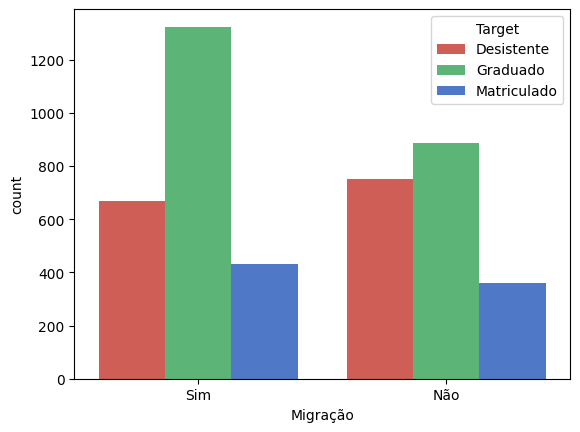

In [27]:
sns.countplot(data=df, x='Migração', hue='Target')
plt.show()

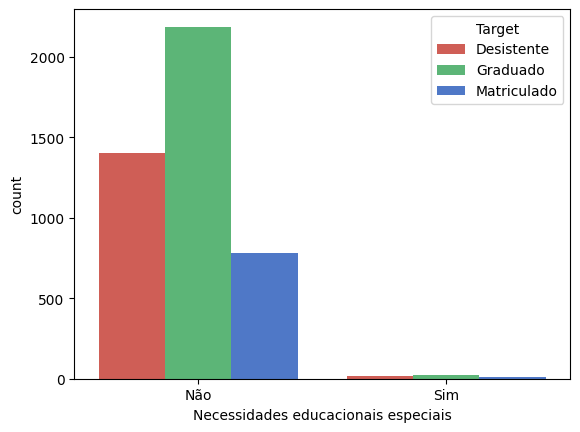

In [28]:
sns.countplot(data=df, x='Necessidades educacionais especiais', hue='Target')
plt.show()

In [29]:
df['Necessidades educacionais especiais'].value_counts(normalize=True)

Não    0.988472
Sim    0.011528
Name: Necessidades educacionais especiais, dtype: float64

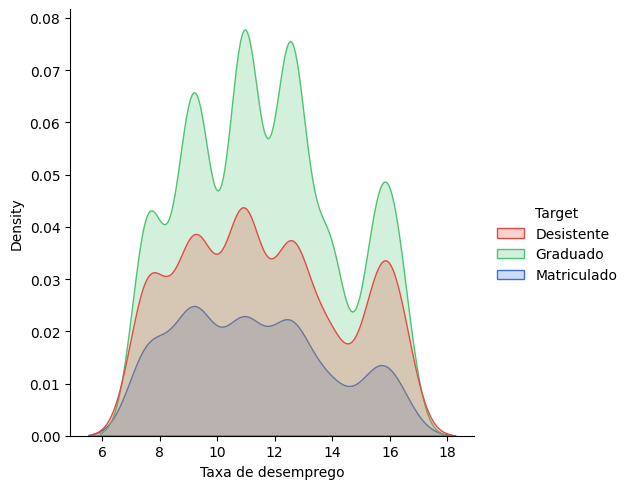

In [30]:
sns.displot(df, x='Taxa de desemprego', hue='Target', kind='kde', fill=True)
plt.show()

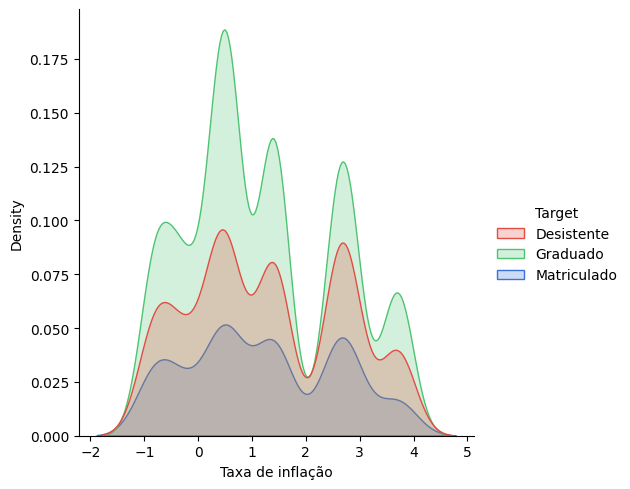

In [31]:
sns.displot(df, x='Taxa de inflação', hue='Target', kind='kde', fill=True)
plt.show()

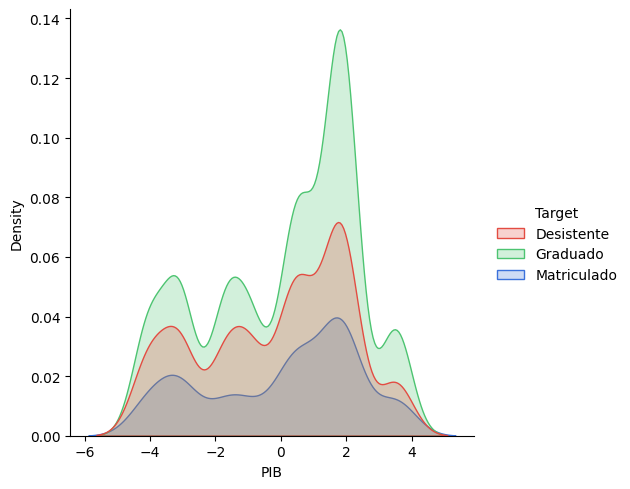

In [32]:
sns.displot(df, x='PIB', hue='Target', kind='kde', fill=True)
plt.show()

In [35]:
contagem_por_qualificacao = df.groupby(['Qualificação prévia', 'Target']).size().reset_index(name='Contagem')
contagem_por_qualificacao['Porcentagem'] = contagem_por_qualificacao.groupby('Qualificação prévia')['Contagem'].transform(lambda x: (x/x.sum())*100)
fig = px.bar(contagem_por_qualificacao, y='Qualificação prévia', x='Porcentagem', color='Target', color_discrete_map=color_dict)
fig.show()

In [34]:
df['Qualificação prévia'].value_counts(normalize=True)*100

Educação secundária                                         84.018987
Curso de especialização tecnológica                          4.950271
Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente     3.661844
Educação superior - licenciatura                             2.848101
Outro - 11º ano de escolaridade                              1.017179
Educação superior - licenciatura (1º ciclo)                  0.904159
Curso técnico superior profissional                          0.813743
Educação superior - bacharelado                              0.519892
Frequência de educação superior                              0.361664
12º ano de escolaridade - não concluído                      0.248644
Educação superior - mestrado                                 0.180832
Educação básica 2º ciclo (6º/7º/8º ano) ou equivalente       0.158228
Educação superior - mestrado (2º ciclo)                      0.135624
11º ano de escolaridade - não concluído                      0.090416
10º ano de escolarid